In [1]:
# Load the needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn import linear_model

In [2]:
# Simulate the data and the model

N = 200
X = np.random.randint(1, 100, N)
Y = 100 + 5 * (X + 3*np.random.randn(N))
thetaStart = np.array([1,1])

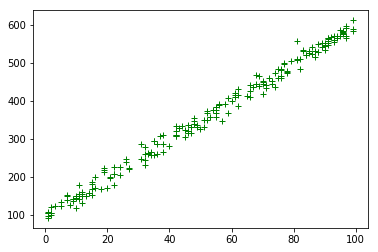

In [5]:
# Scatter Plot the dataset

#plt.plot(X, Y, 'ro')
plt.plot(X, Y, 'g+')

plt.show()

In [6]:
# The cost function for Minimize

def myCost(theta):
    predict = theta[0] + theta[1]*X
    return (1/(2*N))*sum((Y-predict)**2)
    #return (1/(2*N))*sum(abs(Y-predict))

In [7]:
# Minimizing using Minimize with Nelder-Mead

resNM = minimize(myCost, thetaStart, method = 'Nelder-Mead', options={'disp': True})
print(resNM['x'])

Optimization terminated successfully.
         Current function value: 99.581633
         Iterations: 78
         Function evaluations: 149
[97.74736963  5.00875636]


In [8]:
# Minimizing using Minimize with BFGS
# Eh um tipo de gradient descent

resBFGS = minimize(myCost, thetaStart, method = 'BFGS', options={'disp': True})
print(resBFGS['x'])

Optimization terminated successfully.
         Current function value: 99.581633
         Iterations: 8
         Function evaluations: 36
         Gradient evaluations: 9
[97.7473467   5.00875709]


In [9]:
# Minimizing using Minimize with CG

resCG = minimize(myCost, thetaStart, method = 'CG', options={'disp': True})
print(resCG['x'])

         Current function value: 99.581633
         Iterations: 13
         Function evaluations: 396
         Gradient evaluations: 96
[97.74733871  5.00875721]


In [10]:
# Minimizing using Minimize with Newton-CG

def jacobian(theta):
    predict = theta[0] + theta[1]*X
    return np.array([(-1/N)*sum(Y-predict) , (-1/N)*sum(X*(Y-predict))])
    
resNCG = minimize(myCost, thetaStart, method = 'Newton-CG', jac = jacobian, options={'disp': True})
print(resNCG['x'])

Optimization terminated successfully.
         Current function value: 99.581633
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 14
         Hessian evaluations: 0
[97.74732289  5.00875744]


In [11]:
# Using Stochastic Gradient Descent in SKLearn

xAux = (X.reshape(-1,1))
sgd = linear_model.SGDRegressor(loss="squared_loss")
sgd.n_iter = np.ceil(10**6 / len(Y))
sgd.fit(xAux, Y )
print(sgd.intercept_)
print(sgd.coef_)

[97.61697324]
[5.04166171]


C:\Users\jp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
